In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import statistics

In [12]:
conn = sqlite3.connect("Databases\Players\ManchesterCity\RaheemSterling\RaheemSterling_All_Shots_Data.db")
sql_query = """SELECT date, minute, result, h_a,X,Y,
    CAST(xG as REAL) as xG,
    X*120 AS y,
    (1-Y)*80 AS x,
    CASE
        WHEN result == "Goal" THEN 1
        WHEN result != "Goal" THEN 0
    END AS "goal_binary"
    FROM RaheemSterling_All_Shots_Data
    """
df = pd.read_sql(sql_query, conn)
conn.close()

df_left_6yard = df.loc[df.x>30].loc[df.x<40].loc[df.y>114].loc[df.y<120]
df_right_6yard = df.loc[df.x>40].loc[df.x<50].loc[df.y>114].loc[df.y<120]

df_top_left_halfspace = df.loc[df.x>18].loc[df.x<30].loc[df.y>111].loc[df.y<120]
df_bottom_left_halfspace = df.loc[df.x>18].loc[df.x<30].loc[df.y>102].loc[df.y<111]
df_top_right_halfspace = df.loc[df.x>50].loc[df.x<62].loc[df.y>111].loc[df.y<120]
df_bottom_right_halfspace = df.loc[df.x>50].loc[df.x<62].loc[df.y>102].loc[df.y<111]

df_left_penalty = df.loc[df.x>30].loc[df.x<40].loc[df.y>102].loc[df.y<114]
df_right_penalty = df.loc[df.x>40].loc[df.x<50].loc[df.y>102].loc[df.y<114]

df_inside = df.loc[df.x>18].loc[df.x<120].loc[df.y>0].loc[df.y<102]
df_left_outside = df.loc[df.x>0].loc[df.x<18].loc[df.y>0].loc[df.y<120]
df_right_outside = df.loc[df.x>62].loc[df.x<80].loc[df.y>0].loc[df.y<120]
df_inside.loc[df.result =='Goal']

,date,minute,result,h_a,X,Y,xG,y,x,goal_binary
11,2014-09-20 17:30:00,25,Goal,a,0.835,0.3579999923706055,0.025191,100.200000,51.360001,1
227,2017-11-29 20:00:00,95,Goal,h,0.8069999694824219,0.585,0.049679,96.839996,33.200000,1
289,2018-08-12 18:00:00,13,Goal,a,0.8119999694824219,0.534000015258789,0.071562,97.439996,37.279999,1
448,2020-07-11 19:00:00,20,Goal,a,0.7730000305175782,0.5690000152587891,0.029970,92.760004,34.479999,1
469,2020-10-03 16:30:00,16,Goal,a,0.8480000305175781,0.5870000076293945,0.119750,101.760004,33.039999,1
495,2021-01-17 19:15:00,87,Goal,h,0.8159999847412109,0.664000015258789,0.094467,97.919998,26.879999,1


In [4]:
left_6yard_xgdif = float("{:.1f}".format(100 * (df_left_6yard.goal_binary.sum() - df_left_6yard.xG.sum())/len(df_left_6yard.index)))
right_6yard_xgdif = float("{:.1f}".format(100 * (df_right_6yard.goal_binary.sum() - df_right_6yard.xG.sum())/len(df_right_6yard.index)))

top_left_halfspace_xgdif = float("{:.1f}".format(100 * (df_top_left_halfspace.goal_binary.sum() - df_top_left_halfspace.xG.sum())/len(df_top_left_halfspace.index)))
bottom_left_halfspace_xgdif = float("{:.1f}".format(100 * (df_bottom_left_halfspace.goal_binary.sum() - df_bottom_left_halfspace.xG.sum())/len(df_bottom_left_halfspace.index)))
top_right_halfspace_xgdif = float("{:.1f}".format(100 * (df_top_right_halfspace.goal_binary.sum() - df_top_right_halfspace.xG.sum())/len(df_top_right_halfspace.index)))
bottom_right_halfspace_xgdif = float("{:.1f}".format(100 * (df_bottom_right_halfspace.goal_binary.sum() - df_bottom_right_halfspace.xG.sum())/len(df_bottom_right_halfspace.index)))

left_penalty_xgdif = float("{:.1f}".format(100 * (df_left_penalty.goal_binary.sum() - df_left_penalty.xG.sum())/len(df_left_penalty.index)))
right_penalty_xgdif = float("{:.1f}".format(100 * (df_right_penalty.goal_binary.sum() - df_right_penalty.xG.sum())/len(df_right_penalty.index)))

inside_xgdif = float("{:.1f}".format(100 * (df_inside.goal_binary.sum() - df_inside.xG.sum()/len(df_inside.index))/len(df_inside.index)))

average_xgdif = statistics.mean([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif])
max_xgdif = max([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif])
min_xgdif = min([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif])
average_xgdif

1.1888888888888889

In [5]:
def get_colour(xgdif):
    if xgdif > 0:
        colour = 'green'
        alpha = xgdif/max_xgdif
    elif xgdif < 0:
        colour = 'red'
        alpha = xgdif/min_xgdif
    else:
        colour ='#03021a'
        alpha = 0
    return [colour, alpha]

In [6]:
colour, alpha= get_colour(left_6yard_xgdif)
left_6yard= plt.Rectangle((30,114), 10, 6, fc=colour, ec='w', alpha = alpha)
colour, alpha= get_colour(right_6yard_xgdif)
right_6yard = plt.Rectangle((40,114), 10, 6, fc=colour, ec='w', alpha=alpha)

colour, alpha= get_colour(top_left_halfspace_xgdif)
top_left_halfspace = plt.Rectangle((18,111), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(bottom_left_halfspace_xgdif)
bottom_left_halfspace = plt.Rectangle((18,102), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(top_right_halfspace_xgdif)
top_right_halfspace = plt.Rectangle((50,111), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(bottom_right_halfspace_xgdif)
bottom_right_halfspace = plt.Rectangle((50,102), 12, 9, fc=colour, ec='w', alpha=alpha)

colour, alpha= get_colour(left_penalty_xgdif)
left_penalty = plt.Rectangle((30,102), 10, 12, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(right_penalty_xgdif)
right_penalty = plt.Rectangle((40,102), 10, 12, fc=colour, ec='w', alpha=.5)

colour, alpha= get_colour(inside_xgdif)
inside = plt.Rectangle((18, 0), 44, 102, fc=colour, ec='w', alpha=.5)
#colour, alpha= get_colour(left_outside_xgdif)
#left_outside = plt.Rectangle((0,0), 18,120,fc=colour,ec='w',alpha=.5)
#colour, alpha= get_colour(right_outside_xgdif)
#right_outside = plt.Rectangle((62,0), 18,120,fc=colour,ec='w',alpha=.5)

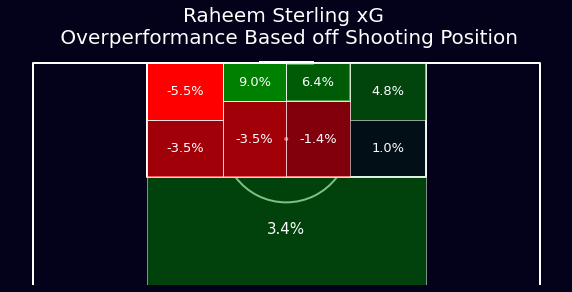

In [7]:
fig, axs = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#03021a') 
pitch = VerticalPitch(pitch_color='#03021a', line_color='white', half=True, pad_bottom=-25)
pitch.draw(ax=axs)

plt.gca().add_patch(left_6yard)
rx, ry = left_6yard.get_xy()
cx = rx + left_6yard.get_width()/2.0
cy = ry + left_6yard.get_height()/2.0
axs.annotate(str(left_6yard_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')

plt.gca().add_patch(right_6yard)
rx, ry = right_6yard.get_xy()
cx = rx + right_6yard.get_width()/2.0
cy = ry + right_6yard.get_height()/2.0
axs.annotate(str(right_6yard_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')
             

plt.gca().add_patch(top_left_halfspace)
rx, ry = top_left_halfspace.get_xy()
cx = rx + top_left_halfspace.get_width()/2.0
cy = ry + top_left_halfspace.get_height()/2.0
axs.annotate(str(top_left_halfspace_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')
             
plt.gca().add_patch(bottom_left_halfspace)
rx, ry = bottom_left_halfspace.get_xy()
cx = rx + bottom_left_halfspace.get_width()/2.0
cy = ry + bottom_left_halfspace.get_height()/2.0
axs.annotate(str(bottom_left_halfspace_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')
             
plt.gca().add_patch(top_right_halfspace)
rx, ry = top_right_halfspace.get_xy()
cx = rx + top_right_halfspace.get_width()/2.0
cy = ry + top_right_halfspace.get_height()/2.0
axs.annotate(str(top_right_halfspace_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')
             
plt.gca().add_patch(bottom_right_halfspace)
rx, ry = bottom_right_halfspace.get_xy()
cx = rx + bottom_right_halfspace.get_width()/2.0
cy = ry + bottom_right_halfspace.get_height()/2.0
axs.annotate(str(bottom_right_halfspace_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')

plt.gca().add_patch(left_penalty)
rx, ry = left_penalty.get_xy()
cx = rx + left_penalty.get_width()/2.0
cy = ry + left_penalty.get_height()/2.0
axs.annotate(str(left_penalty_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')
             
plt.gca().add_patch(right_penalty)
rx, ry = right_penalty.get_xy()
cx = rx + right_penalty.get_width()/2.0
cy = ry + right_penalty.get_height()/2.0
axs.annotate(str(right_penalty_xgdif)+"%", (cx, cy), color='w', fontsize=13, ha='center', va='center')


plt.gca().add_patch(inside)
rx, ry = inside.get_xy()
cx = rx + inside.get_width()/2.0
cy = ry + inside.get_height()/2.0
axs.annotate(str(inside_xgdif)+"%", (cx, cy+42), color='w', fontsize=15, ha='center')

#plt.gca().add_patch(left_outside)
#plt.gca().add_patch(right_outside)


plt.title('Raheem Sterling xG \n Overperformance Based off Shooting Position', y=0.95, fontsize=20, color='w')
plt.show()